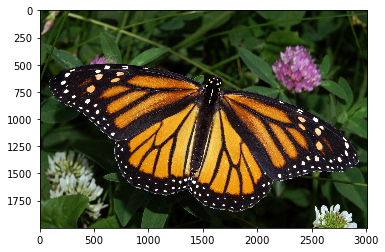

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

#Read in an image
image = cv2.imread('images/monarch.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [2]:
#Reshape the image in 2D array of pixels and three color values
pixel_vals = image.reshape((-1,3))
#Convert to float32 type
pixel_vals = np.float32(pixel_vals)

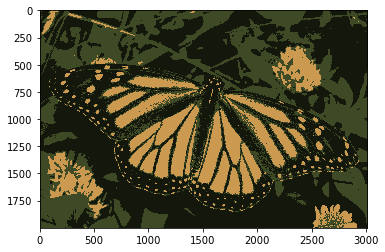

In [19]:
#IMplement K-Means clustering
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
k = 3
retval,labels,centers = cv2.kmeans(pixel_vals,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# Reshape data into original image size
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0],image.shape[1])
plt.imshow(segmented_image)

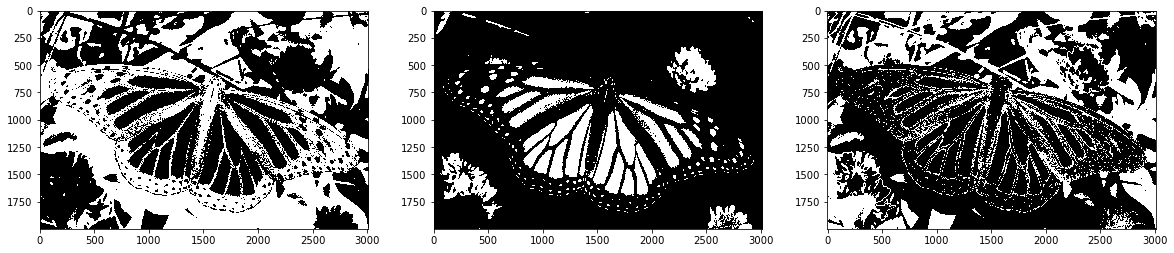

In [29]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
ax1.imshow(labels_reshape==0,cmap='gray')
ax2.imshow(labels_reshape==1,cmap='gray')
ax3.imshow(labels_reshape==2,cmap='gray')


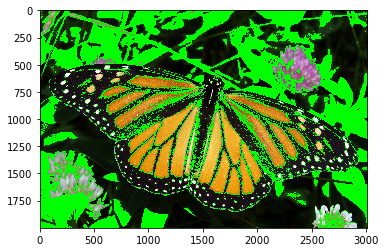

In [28]:
# mask an image segment by cluster

cluster = 2 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)